In [1]:
# Imports
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Plots, Graphs, & Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter

# importing sys
import sys
# adding 00_helper_files to the system path
sys.path.insert(0, '/Users/qmcbt/codeup-data-science/00_helper_files')
# env containing sensitive access credentials
import env
from env import user, password, host
from env import get_db_url
# Import Helper Modules
import QMCBT_00_quicktips as qt
import QMCBT_01_acquire as acq
import QMCBT_02_prepare as prep
import QMCBT_03_explore as exp
import QMCBT_04_visualize as viz
import QMCBT_05_model as mod
import QMCBT_wrangle as w

# Acquire

In [2]:
# Read in the CSV acquired from FINXTER https://github.com/finxter/loan_predicition
df = pd.read_csv('LoanApprovalPrediction.csv')

In [3]:
# Look at the data
df.T

,0,1,2,3,4,5,6,7,8,9,...,588,589,590,591,592,593,594,595,596,597
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008,LP001011,LP001013,LP001014,LP001018,LP001020,...,LP002959,LP002960,LP002961,LP002964,LP002974,LP002978,LP002979,LP002983,LP002984,LP002990
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Female,Male,Male,Male,Male,Female,Male,Male,Male,Female
Married,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
Dependents,0.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,2.0,1.0,...,1.0,0.0,1.0,2.0,0.0,0.0,3.0,1.0,2.0,0.0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,...,Graduate,Not Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,Yes,No,No,Yes,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Yes
ApplicantIncome,5849,4583,3000,2583,6000,5417,2333,3036,4006,12841,...,12000,2400,3400,3987,3232,2900,4106,8072,7583,4583
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0,4196.0,1516.0,2504.0,1526.0,10968.0,...,0.0,3800.0,2500.0,1411.0,1950.0,0.0,0.0,240.0,0.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0,267.0,95.0,158.0,168.0,349.0,...,496.0,NaN,173.0,157.0,108.0,71.0,40.0,253.0,187.0,133.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,...,360.0,180.0,360.0,360.0,360.0,360.0,180.0,360.0,360.0,360.0


In [4]:
# List the Columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Data Dictionary

|Column|Description|DType|
|:-----|:----------|:---:|
|Loan_ID|INDEX|INDEX|
|Gender|1 = Male, 0 = Female|INT|
|Married|1 = Yes, 0 = No|INT|
|Dependents|Number of Dependants|FLOAT|
|Education|Graduate: 1 = Yes, 0 = No|INT|
|Self_Employed|1 = Yes, 0 = No|INT|
|ApplicantIncome|How much the Applicant makes per year|INT|
|CoapplicantIncome|How much the Co-Applicant makes per year|FLOAT|
|LoanAmount|The amount of the loan|FLOAT|
|Loan_Amount_Term|How many Months it will take to repay the loan|FLOAT|
|Credit_History|UNK|FLOAT|
|Property_Area|1 = Semiurban, 2 = Urban, 0 = Rural|INT|

## Target
|Column|Description|DType|
|:-----|:----------|:---:|
|Loan_Status|Approved: 1 = Yes, 0 = No|INT|

# Observations
* There are four features that contain Nulls
    * Dependents         12 nulls
    * LoanAmount         21 nulls
    * Loan_Amount_Term   14 nulls
    * Credit_History     49 nulls
* Encode
    * Gender  Male 0|1
    * Married 0|1
    * Education     Graduate 0|1
    * Self_Employed 0|1
* Change DTYPE
    * Dependents        INT
    * ApplicantIncome   FLOAT
    * Loan_Amount_Term  INT

# Prepare

In [5]:
# Show Null and Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [6]:
# Show Unique Value Count of each Column
exp.nunique_column_all(df)

LP001002    1
LP002296    1
LP002300    1
LP002301    1
LP002305    1
           ..
LP001691    1
LP001692    1
LP001693    1
LP001698    1
LP002990    1
Name: Loan_ID, Length: 598, dtype: int64

Male      487
Female    111
Name: Gender, dtype: int64

Yes    388
No     210
Name: Married, dtype: int64

0.0    338
1.0    101
2.0     99
3.0     48
Name: Dependents, dtype: int64

Graduate        465
Not Graduate    133
Name: Education, dtype: int64

No     488
Yes    110
Name: Self_Employed, dtype: int64

2500    9
2600    6
6000    6
4583    6
3333    5
       ..
3975    1
3244    1
4408    1
3917    1
7583    1
Name: ApplicantIncome, Length: 491, dtype: int64

0.0       265
1666.0      5
2083.0      5
2500.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 283, dtype: int64

120.0    20
110.0    16
100.0    15
187.0    12
128.0    11
         ..
72.0      1
240.0     1
214.0     1
59.0      1
253.0  

In [7]:
# Are there any Duplicate IDs?
df.Loan_ID.nunique()

598

In [8]:
# Reset the index to our Loan_ID
df = df.set_index('Loan_ID')

In [9]:
# Check Work
df.T

Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008,LP001011,LP001013,LP001014,LP001018,LP001020,...,LP002959,LP002960,LP002961,LP002964,LP002974,LP002978,LP002979,LP002983,LP002984,LP002990
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Female,Male,Male,Male,Male,Female,Male,Male,Male,Female
Married,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
Dependents,0.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,2.0,1.0,...,1.0,0.0,1.0,2.0,0.0,0.0,3.0,1.0,2.0,0.0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,...,Graduate,Not Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,Yes,No,No,Yes,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Yes
ApplicantIncome,5849,4583,3000,2583,6000,5417,2333,3036,4006,12841,...,12000,2400,3400,3987,3232,2900,4106,8072,7583,4583
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0,4196.0,1516.0,2504.0,1526.0,10968.0,...,0.0,3800.0,2500.0,1411.0,1950.0,0.0,0.0,240.0,0.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0,267.0,95.0,158.0,168.0,349.0,...,496.0,NaN,173.0,157.0,108.0,71.0,40.0,253.0,187.0,133.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,...,360.0,180.0,360.0,360.0,360.0,360.0,180.0,360.0,360.0,360.0
Credit_History,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [10]:
# Use SKLearn to encode our Categorical 'Object" columns
label_encoder = LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
    df[col] = label_encoder.fit_transform(df[col])

In [11]:
# Check DTypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    int64  
 1   Married            598 non-null    int64  
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    int64  
 4   Self_Employed      598 non-null    int64  
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    int64  
 11  Loan_Status        598 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 76.9+ KB


In [12]:
# Check Encoding
df.T

Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008,LP001011,LP001013,LP001014,LP001018,LP001020,...,LP002959,LP002960,LP002961,LP002964,LP002974,LP002978,LP002979,LP002983,LP002984,LP002990
Gender,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
Married,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
Dependents,0.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,2.0,1.0,...,1.0,0.0,1.0,2.0,0.0,0.0,3.0,1.0,2.0,0.0
Education,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Self_Employed,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ApplicantIncome,5849.0,4583.0,3000.0,2583.0,6000.0,5417.0,2333.0,3036.0,4006.0,12841.0,...,12000.0,2400.0,3400.0,3987.0,3232.0,2900.0,4106.0,8072.0,7583.0,4583.0
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0,4196.0,1516.0,2504.0,1526.0,10968.0,...,0.0,3800.0,2500.0,1411.0,1950.0,0.0,0.0,240.0,0.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0,267.0,95.0,158.0,168.0,349.0,...,496.0,NaN,173.0,157.0,108.0,71.0,40.0,253.0,187.0,133.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,...,360.0,180.0,360.0,360.0,360.0,360.0,180.0,360.0,360.0,360.0
Credit_History,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [13]:
# Show Unique Value Count of each Column
exp.nunique_column_all(df)

1    487
0    111
Name: Gender, dtype: int64

1    388
0    210
Name: Married, dtype: int64

0.0    338
1.0    101
2.0     99
3.0     48
Name: Dependents, dtype: int64

0    465
1    133
Name: Education, dtype: int64

0    488
1    110
Name: Self_Employed, dtype: int64

2500    9
2600    6
6000    6
4583    6
3333    5
       ..
3975    1
3244    1
4408    1
3917    1
7583    1
Name: ApplicantIncome, Length: 491, dtype: int64

0.0       265
1666.0      5
2083.0      5
2500.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 283, dtype: int64

120.0    20
110.0    16
100.0    15
187.0    12
128.0    11
         ..
72.0      1
240.0     1
214.0     1
59.0      1
253.0     1
Name: LoanAmount, Length: 199, dtype: int64

360.0    500
180.0     43
480.0     14
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

1.0    463
0.0    

#### Encode Correction
* Graduate was encoded to 0 (False)
* I need to replace values so that Graduate equates to 1 (True)

In [14]:
# Check value counts
df.Education.value_counts()

0    465
1    133
Name: Education, dtype: int64

In [15]:
# Use Replace to switch 1|0 values
df['Education'] = df['Education'].replace(1,2)
df['Education'] = df['Education'].replace(0,1)
df['Education'] = df['Education'].replace(2,0)
df.Education.value_counts()

1    465
0    133
Name: Education, dtype: int64

#### IMPUTE NULLS

In [16]:
# Show Null Count
df.isna().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
# Show Total Null Count
df.isna().sum().sum()

96

In [18]:
# Check the percentage of dropping all Nulls
df.dropna().shape[0]/df.shape[0]

0.8444816053511706

In [19]:
# IMPUTE Null with mean
for col in df.columns:
    df[col] = df[col].fillna(df[col].mean())

In [20]:
# Show Null Count
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EXPLORE

### Split

 _____________________________________________________________ 
|                              DF                             |
|-------------------------------------------------------------|
|       Train       |       Validate    |          Test       |
|-------------------|-------------------|---------------------|
| x_train | y_train |   x_val  |  y_val |   x_test  |  y_test |
:_____________________________________________________________: 

   Train: 381 rows 0.64%
Validate: 127 rows 0.21%
    Test: 90 rows 0.15%


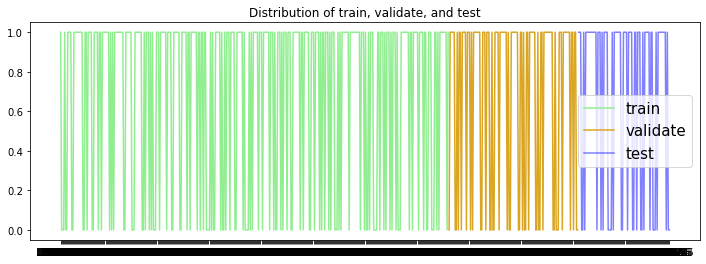

None


In [21]:
train, validate, test = prep.train_val_test_split(df, 'Loan_Status')

In [22]:
# Take a peek at the train data
train.T

Loan_ID,LP002053,LP001119,LP001489,LP001641,LP001266,LP002837,LP001197,LP002408,LP002961,LP001616,...,LP002637,LP001744,LP002401,LP002734,LP002031,LP001405,LP001265,LP001798,LP001883,LP002398
Gender,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.000000,1.0,1.0,1.000000,0.0,1.0,0.0,1.0
Married,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.000000,1.0,1.0,1.000000,0.0,1.0,0.0,0.0
Dependents,3.0,0.0,0.0,1.0,1.000000,3.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.000000,0.0,1.0,1.000000,0.0,2.0,0.0,0.0
Education,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.000000,1.0,0.0,1.000000,1.0,1.0,1.0,1.0
Self_Employed,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.0,0.0
ApplicantIncome,4342.0,3600.0,4583.0,2178.0,2395.000000,3400.0,3366.0,3660.0,3400.0,3750.0,...,3598.0,2971.0,2213.000000,6133.0,3399.0,2214.000000,3846.0,5819.0,3418.0,1926.0
CoapplicantIncome,189.0,0.0,0.0,0.0,0.000000,2500.0,2200.0,5064.0,2500.0,0.0,...,1287.0,2791.0,1125.000000,3906.0,1640.0,1398.000000,0.0,5000.0,0.0,1851.0
LoanAmount,124.0,80.0,84.0,66.0,144.968804,123.0,135.0,187.0,173.0,116.0,...,100.0,144.0,144.968804,324.0,111.0,85.000000,111.0,120.0,135.0,50.0
Loan_Amount_Term,360.0,360.0,360.0,300.0,360.000000,360.0,360.0,360.0,360.0,360.0,...,360.0,360.0,360.000000,360.0,180.0,360.000000,360.0,360.0,360.0,360.0
Credit_History,1.0,1.0,1.0,0.0,1.000000,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.000000,1.0,1.0,0.843352,1.0,1.0,1.0,1.0


In [23]:
train.Loan_Status.value_counts()

1    262
0    119
Name: Loan_Status, dtype: int64

In [37]:
print(f'   Approved: {262} loans = {(round(262/381,2)*100)}%')
print(f'Disapproved: {119} loans = {(round(119/381,2)*100)}%')

   Approved: 262 loans = 69.0%
Disapproved: 119 loans = 31.0%


#### Visualizations

<AxesSubplot:xlabel='Loan_Status'>

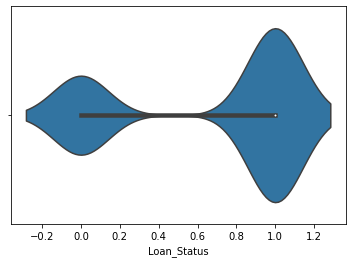

In [44]:
# Target Distribution
sns.violinplot(x=train["Loan_Status"])

<AxesSubplot:xlabel='Loan_Status', ylabel='Education'>

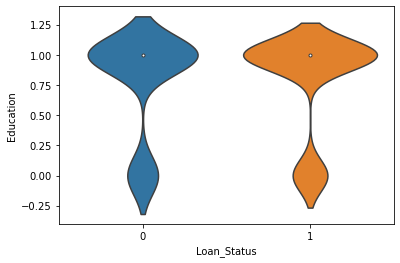

In [45]:
# Compare Loan_Status with Education
sns.violinplot(data=train, x="Loan_Status", y="Education")

<AxesSubplot:xlabel='Loan_Status', ylabel='Property_Area'>

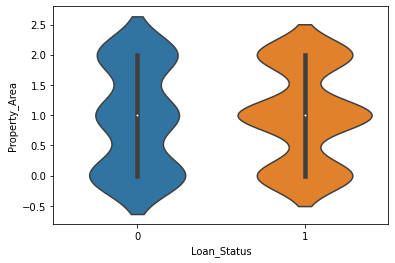

In [46]:
# Compare Loan_Status with 
sns.violinplot(data=train, x="Loan_Status", y="Property_Area")

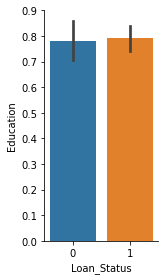

In [58]:
sns.catplot(
    data=train, y="Education", x="Loan_Status", 
    kind="bar", height=4, aspect=.6,
)

<AxesSubplot:xlabel='Loan_Status', ylabel='Education'>

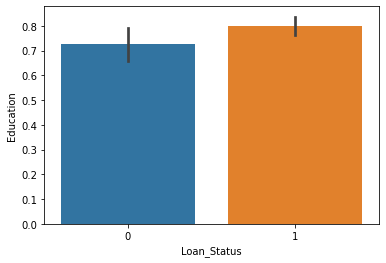

In [57]:
sns.barplot(data=df, x="Loan_Status", y="Education")